# Εξόρυξη γνώσης από δεδομένα συναλλαγών καταστήματος λιανικής

# Άσκηση 1

Αρχικά, φορτώνουμε το dataset ως Panda DataFrame. Εκτελούμε μια γρήγορη ανάλυση των δεδομένων σε συνδυασμό με ένα γράφημα για να ανακαλύψουμε τυχόν γνώση.
Κάποιες ενδιαφέρουσες πληροφορίες που προέκυψαν είναι οι εξής:

a) Η μέση αξία καλαθιού είναι περίπου 5.06, η ελάχιστη 1.1 και η μέγιστη 25.1. Η πλειοψηφία (75%) των καλαθιών έχουν αξία έως 7. Στο γράφημα φαίνεται πως η κατανομή που ακολουθεί η αξία του καλαθιού είναι εκθετική. Όσο μεγαλώνει η αξία τόσο η συχνότητα που αυτή εμφανίζεται πέφτει εκθετικά.

b) Η μέση τιμή των ημερών που πέρασαν από τη συναλλαγή (recency_days) είναι 37.8 με τυπική απόκλιση 25.1. Στο γράφημα παρατηρούμε ότι οι περισσότερες συναλλαγές είτε είναι πολύ πρόσφατες (0 έως 10 μέρες), είτε πολύ παλιές (68 έως 75)

   id  basket_value  recency_days            Item_1               Item_2  \
0   1           1.1             2      citrus fruit  semi-finished bread   
1   2           3.6            31    tropical fruit               yogurt   
2   3           1.2             7        whole milk                  NaN   
3   4           6.6             7         pip fruit               yogurt   
4   5           2.5            66  other vegetables           whole milk   

           Item_3                    Item_4 Item_5 Item_6 Item_7  ... Item_23  \
0       margarine               ready soups    NaN    NaN    NaN  ...     NaN   
1          coffee                       NaN    NaN    NaN    NaN  ...     NaN   
2             NaN                       NaN    NaN    NaN    NaN  ...     NaN   
3   cream cheese               meat spreads    NaN    NaN    NaN  ...     NaN   
4  condensed milk  long life bakery product    NaN    NaN    NaN  ...     NaN   

  Item_24 Item_25 Item_26 Item_27 Item_28 Item_29 Item_3

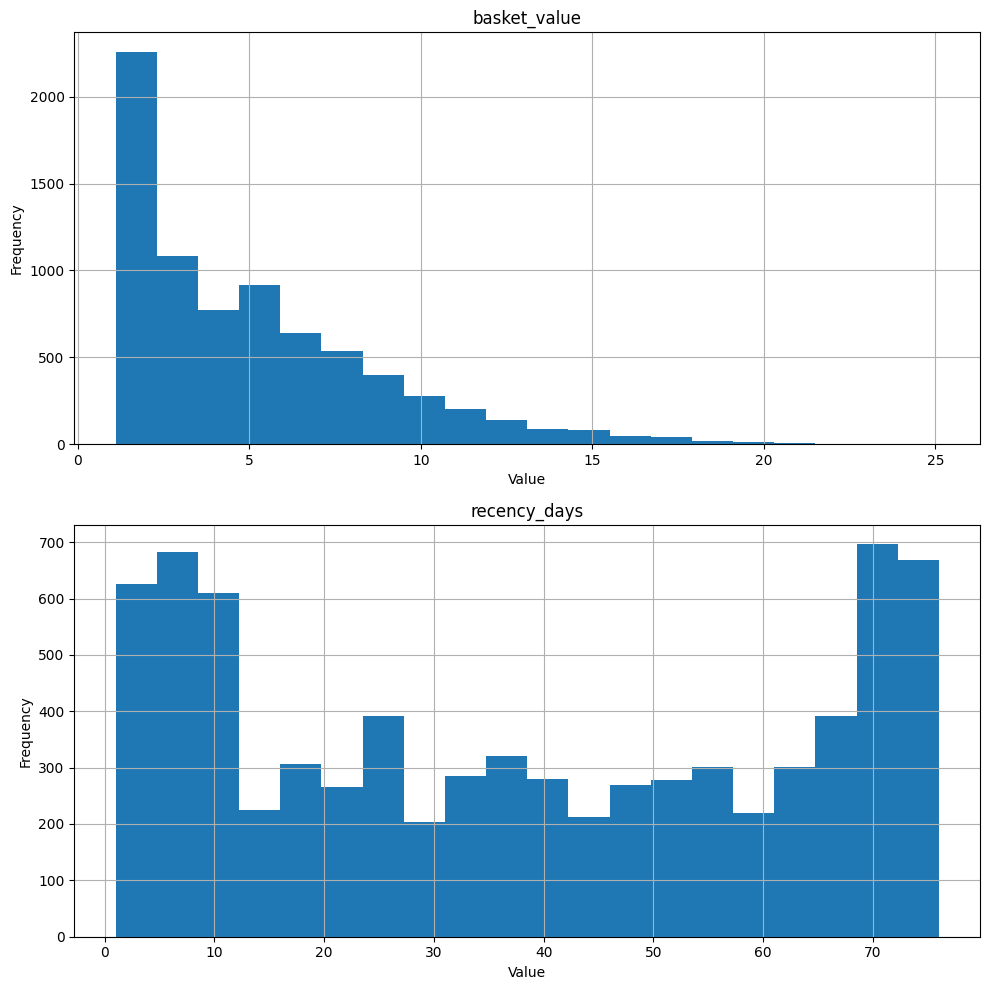

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Φόρτωση του συνόλου δεδομένων
url = "https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s"
data = pd.read_csv(url)

# Εμφάνιση των πρώτων γραμμών του DataFrame για επιβεβαίωση
print(data.head())

# Ανάλυση των δεδομένων
desired_columns = ['basket_value', 'recency_days']
print(data[desired_columns].describe())

# Οπτικοποίηση των δεδομένων
fig, axes = plt.subplots(nrows=len(desired_columns), ncols=1, figsize=(10, 10))

for i, column in enumerate(desired_columns):
    data[column].hist(ax=axes[i], bins=20)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


Στο παρακάτω κομμάτι κώδικα, διατηρούμε μόνο τα προϊόντα που μας ενδιαφέρουν και στη συνέχεια μετατρέπουμε το DataFrame σε δυαδική μορφή.

In [ ]:
# Επιλογή μόνο των στηλών που περιέχουν προϊόντα
product_columns = data.columns[3:]

# Δημιουργία μιας λίστας με τα προϊόντα που αγοράστηκαν σε κάθε συναλλαγή
transactions = []
for _, row in data.iterrows():
    transaction = [product for product in row[product_columns] if isinstance(product, str)]
    transactions.append(transaction)

# Δημιουργία του δυαδικού διανύσματος
binary_transactions = pd.get_dummies(pd.DataFrame(transactions), prefix='', prefix_sep='').groupby(level=0, axis=1).max()

interested_products = [
    "citrus fruit", "tropical fruit", "whole milk", "other vegetables",
    "rolls/buns", "chocolate", "bottled water", "yogurt", "sausage",
    "root vegetables", "pastry", "soda", "cream"
]
# Δημιουργία του δυαδικού διανύσματος με βάση τα επιλεγμένα προϊόντα
binary_transactions = binary_transactions[interested_products]
binary_transactions.head()
len(binary_transactions)

7536

Διακριτοποιούμε τη μεταβλητή basket_value σε 3 κατηγορίες low_value_basket, medium_value_basket και high_value_basket.

In [ ]:
# Διακριτοποίηση της αξίας των συναλλαγών σε τρεις ισοπληθείς κατηγορίες
data['basket_value_category'] = pd.qcut(data['basket_value'], q=3, labels=['low_value_basket', 'medium_value_basket', 'high_value_basket'])

# Επιβεβαίωση της διακριτοποίησης της αξίας των συναλλαγών
print(data['basket_value_category'].value_counts())

basket_value_category
low_value_basket       2572
high_value_basket      2505
medium_value_basket    2459
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Κατασκευάζουμε ένα γράφημα για να βρούμε πόσες φορές εμφανίζεται κάθε προϊόν στις συναλλαγές. Παρατηρούμε ότι το πιο δημοφιλές προϊόν είναι το whole milk, καθώς έχει αγοραστεί 2513 φορές, ενώ το cream είναι το λιγότερο δημοφιλές με 13 πωλήσεις.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


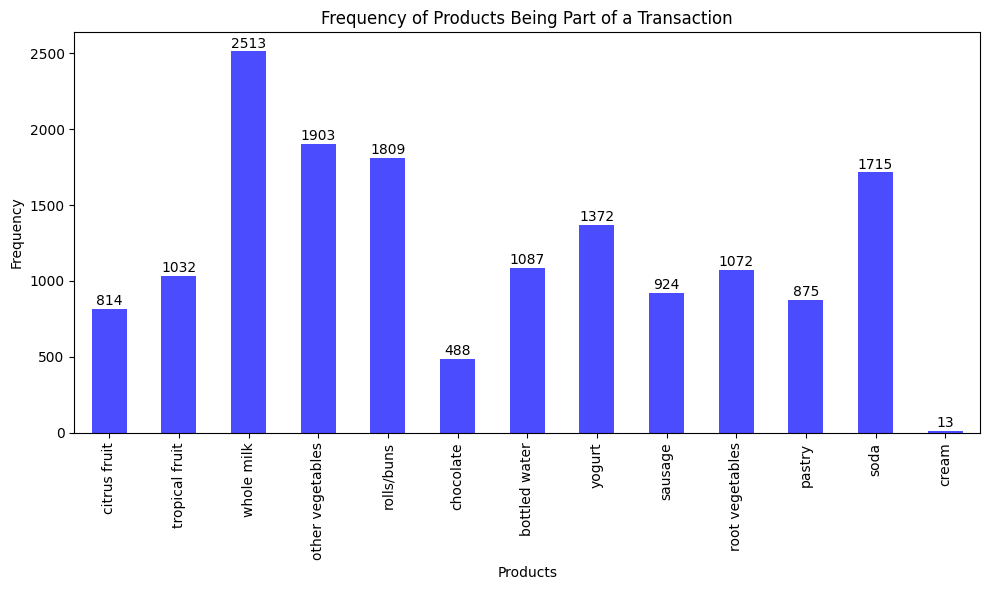

In [ ]:
# Υπολογίζουμε πόσες φορές βρίσκεται κάθε προϊόν στο σύνολο των συναλλαγών
product_counts_true = binary_transactions.sum()

# Plotting
plt.figure(figsize=(10, 6))
ax = product_counts_true.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Frequency of Products Being Part of a Transaction')
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for i, v in enumerate(product_counts_true):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


# Άσκηση 2

Εφαρμόζουμε την μέθοδο Apriori για να βρούμε τα πιο συχνά υποσύνολα προϊόντων. Το ελάχιστο support που επιλέχθηκε είναι το 0.03 γιατί μας δίνει ικανοποιητικό αριθμό υποσυνόλων, ενώ παράλληλα είναι ένα κατώφλι τέτοιο ώστε να μπορέσουμε να δώσουμε μια ερμηνεία στα υποσύνολα αυτά.

Παρατηρούμε ότι το whole milk βρίσκεται στα πιο συχνά υποσύνολα και βρίσκεται συχνά στο καλάθι μαζί με other vegetables, rolls/buns, tropical fruit και yogurt.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

min_support = 0.03

# Εκτέλεση της μεθόδου Apriori
frequent_itemsets = apriori(binary_transactions, min_support=min_support, use_colnames=True)
print(f"Min Support: {min_support}")
frequent_itemsets= frequent_itemsets.sort_values(by='support', ascending=False)
print(frequent_itemsets)

Min Support: 0.03
     support                                         itemsets
2   0.333466                                     (whole milk)
3   0.252521                               (other vegetables)
4   0.240048                                     (rolls/buns)
11  0.227574                                           (soda)
7   0.182059                                         (yogurt)
6   0.144241                                  (bottled water)
9   0.142251                                (root vegetables)
1   0.136943                                 (tropical fruit)
8   0.122611                                        (sausage)
10  0.116109                                         (pastry)
0   0.108015                                   (citrus fruit)
18  0.097665                   (other vegetables, whole milk)
19  0.073912                         (rolls/buns, whole milk)
21  0.073116                             (yogurt, whole milk)
5   0.064756                                      (c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Βρίσκουμε τους 20 κανόνες με το υψηλότερο confindence. Παρατηρούμε ότι το whole milk εμφανίζεται στην πλειοψηφία των κανόνων, μιας και όπως ήδη γνωρίζουμε αποτελεί το πιο δημοφιλές προϊόν και βρίσκεται περίπου στο 1/3 των συνολικών καλαθιών. Πέρα από το γάλα, κοιτώντας τους υψηλότερους σε confidence κανόνες προκύπτει ότι οι πελάτες όταν αγοράζουν root vegetables είναι πολύ πιθανό να αγοράσουν και άλλα είδη λαχανικών, όταν αγοράζουν φρούτα (tropical ή citrus) αγοράζουν και λαχανικά και όταν αγοράζουν λουκάνικα συνήθως τα συνδυάζουν με buns και λαχανικά.

In [ ]:
# Εύρεση των 20 κανόνων με το υψηλότερο confidence αποκλειστικά για τα προϊόντα
rules_products = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
top_20_rules_products = rules_products.nlargest(20, 'confidence')
top_20_rules_products = top_20_rules_products[['antecedents', 'consequents', 'confidence', 'support']]
print("Top 20 Rules for Products:")
print(top_20_rules_products)

Top 20 Rules for Products:
                            antecedents         consequents  confidence  \
59  (other vegetables, root vegetables)        (whole milk)    0.489270   
60        (whole milk, root vegetables)  (other vegetables)    0.474012   
7                     (root vegetables)        (whole milk)    0.448694   
9                     (root vegetables)  (other vegetables)    0.434701   
14                     (tropical fruit)        (whole milk)    0.403101   
4                              (yogurt)        (whole milk)    0.401603   
0                    (other vegetables)        (whole milk)    0.386758   
26                             (pastry)        (whole milk)    0.373714   
32                       (citrus fruit)        (whole milk)    0.368550   
40                       (citrus fruit)  (other vegetables)    0.348894   
20                     (tropical fruit)  (other vegetables)    0.342054   
31                            (sausage)        (rolls/buns)    0.325758  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Τώρα βρίσκουμε τους 20 κανόνες με το υψηλότερο confidence στα προϊόντα και στην διακριτοποιημένη αξία καλαθιού.

Παρατηρούμε ότι και οι 20 κανόνες αφορούν καλάθια υψηλής αξίας. Μάλιστα, κοιτώντας τους 4 πρώτους κανόνες, όταν υπάρχουν στο καλάθι λουκάνικα με whole milk, other vegetables, rolls/buns ή soda τότε πάντα το καλάθι είναι υψηλής αξίας. Συμπεραίνουμε ότι τα λουκάνικα είναι πιθανότατα το πιο ακριβό προϊόν, αφού (σύμφωνα με τον 5ο κανόνα) όταν υπάρχουν λουκάνικα στο καλάθι τότε μιλάμε για καλάθι υψηλής αξίας με πιθανότητα 87%.

Δεν εμφανίζονται κανόνες που να έχουν σχέση με καλάθια χαμηλής ή μεσαίας αξίας. Για να βρεθούν τέτοιοι πρέπει να ψάξουμε σε βάθος 200 κανόνων, αλλά ακόμα και να το κάνουμε αυτό, δεν φαίνεται να προκύπτουν κανόνες που να προσφέρουν κάποια σημαντική ερμηνεία.

In [ ]:
# Δημιουργία νέου δυαδικού διανύσματος συναλλαγών με την προσθήκη των διακριτοποιημένων τιμών της αξίας καλαθιού
binary_transactions['low_value_basket'] = False
binary_transactions['medium_value_basket'] = False
binary_transactions['high_value_basket'] = False

value = data['basket_value_category']

for index, row in binary_transactions.iterrows():
      binary_transactions.at[index, value[index]] = True


# Εύρεση των 20 κανόνων με υψηλότερο confidence για τα προϊόντα και την αξία καλαθιού
frequent_itemsets = apriori(binary_transactions, min_support=min_support, use_colnames=True)
rules_products = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
top_20_rules_products = rules_products.nlargest(20, 'confidence')
top_20_rules_products = top_20_rules_products[['antecedents', 'consequents', 'confidence', 'support']]
print("Top 20 Rules for Products:")
print(top_20_rules_products)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 20 Rules for Products:
                             antecedents          consequents  confidence  \
154                (sausage, whole milk)  (high_value_basket)    1.000000   
188          (other vegetables, sausage)  (high_value_basket)    1.000000   
211                (sausage, rolls/buns)  (high_value_basket)    1.000000   
224                      (soda, sausage)  (high_value_basket)    1.000000   
97                             (sausage)  (high_value_basket)    0.875541   
166                 (pastry, whole milk)  (high_value_basket)    0.844037   
124             (tropical fruit, yogurt)  (high_value_basket)    0.798611   
113         (tropical fruit, whole milk)  (high_value_basket)    0.769231   
118   (tropical fruit, other vegetables)  (high_value_basket)    0.764873   
206                 (yogurt, rolls/buns)  (high_value_basket)    0.757396   
182           (yogurt, other vegetables)  (high_value_basket)    0.733021   
176       (other vegetables, rolls/buns)  (high_v

# Άσκηση 3

Εφαρμόζουμε clustering 5 ομάδων στα συνεχή χαρακτηριστικά basket_value και recency_days

In [ ]:
from sklearn.cluster import KMeans

# Εφαρμογή 5-means clustering στα χαρακτηριστικά basket_value και recency_days
X = data[['basket_value', 'recency_days']]
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Προσθήκη των cluster labels στο αρχικό DataFrame
data['cluster'] = kmeans.labels_
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32,basket_value_category,cluster
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low_value_basket,0
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium_value_basket,2
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low_value_basket,0
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high_value_basket,0
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low_value_basket,4


Υπολογίζουμε τις βασικές μετρικές για κάθε cluster. Βρίσκουμε μέση τιμή και τυπική απόκλιση για τα δύο χαρακτηριστικά και υπολογίζουμε το πλήθος και το ποσοστό των συναλλαγών που ανήκουν σε κάθε cluster. Θα χρησιμοποιήσουμε παρακάτω αυτά τα αποτελέσματα για να ερμηνεύσουμε ποιοτικά την κάθε ομάδα.

In [ ]:
# Αποθήκευση των cluster centers
cluster_centers = kmeans.cluster_centers_

# Υπολογισμός μέσης τιμής και τυπικής απόκλισης για κάθε cluster
total_transactions = len(data)
for i, center in enumerate(cluster_centers):
    mean_basket_value = center[0]
    mean_recency_days = center[1]
    std_basket_value = X[data['cluster'] == i]['basket_value'].std()
    std_recency_days = X[data['cluster'] == i]['recency_days'].std()

    # Υπολογισμός ποσοστού συναλλαγών του κάθε cluster επί του συνόλου
    cluster_transactions = len(X[data['cluster'] == i])
    cluster_percentage = (cluster_transactions / total_transactions) * 100

    print(f"Cluster {i+1}:")
    print(f"Mean Basket Value: {mean_basket_value}")
    print(f"Mean Recency Days: {mean_recency_days}")
    print(f"Standard Deviation of Basket Value: {std_basket_value}")
    print(f"Standard Deviation of Recency Days: {std_recency_days}")
    print(f"Total number of Transactions: {cluster_transactions}")
    print(f"Percentage of Transactions: {cluster_percentage:.2f}%")
    print()


Cluster 1:
Mean Basket Value: 4.859999999999999
Mean Recency Days: 6.851105651105097
Standard Deviation of Basket Value: 4.017272946321592
Standard Deviation of Recency Days: 3.4958176366393583
Total number of Transactions: 2037
Percentage of Transactions: 27.03%

Cluster 2:
Mean Basket Value: 2.867960363336089
Mean Recency Days: 55.00825763831564
Standard Deviation of Basket Value: 1.2763444903049368
Standard Deviation of Recency Days: 4.802368339935059
Total number of Transactions: 1211
Percentage of Transactions: 16.07%

Cluster 3:
Mean Basket Value: 3.880279375513561
Mean Recency Days: 37.978635990139686
Standard Deviation of Basket Value: 0.7446335999677463
Standard Deviation of Recency Days: 4.769648121584709
Total number of Transactions: 1217
Percentage of Transactions: 16.15%

Cluster 4:
Mean Basket Value: 7.886628383921243
Mean Recency Days: 22.11156685808057
Standard Deviation of Basket Value: 3.552336555397173
Standard Deviation of Recency Days: 4.529555058337452
Total numbe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Δημιουργούμε μερικά επιπλέον γραφήματα για τα clusters.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


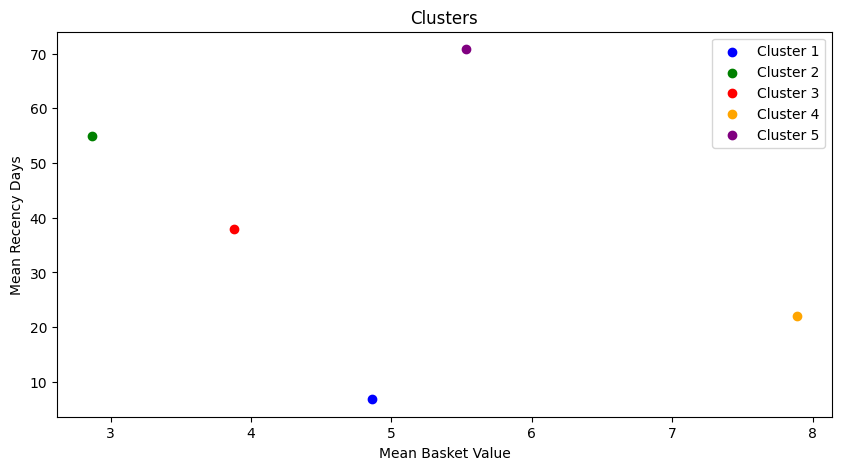

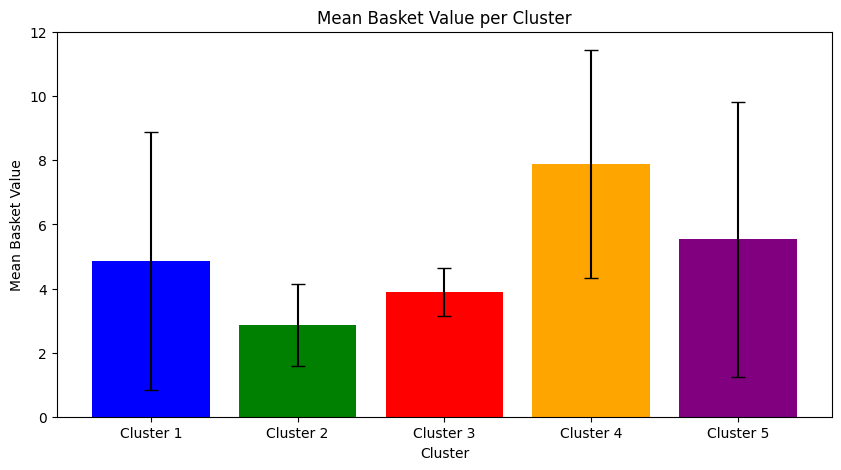

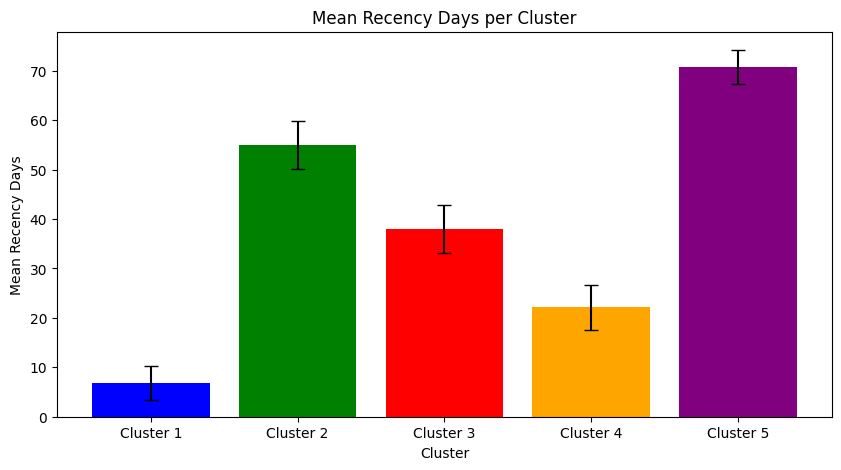

In [ ]:
cluster_labels = [f'Cluster {i+1}' for i in range(len(cluster_centers))]
colors = ['blue', 'green', 'red', 'orange', 'purple']

mean_basket_values = [center[0] for center in cluster_centers]
std_basket_values = [X[data['cluster'] == i]['basket_value'].std() for i in range(len(cluster_centers))]

mean_recency_days = [center[1] for center in cluster_centers]
std_recency_days = [X[data['cluster'] == i]['recency_days'].std() for i in range(len(cluster_centers))]

# Plot clusters
plt.figure(figsize=(10, 5))
for i, label in enumerate(cluster_labels):
    plt.scatter(mean_basket_values[i], mean_recency_days[i], color=colors[i], label=label)

plt.xlabel('Mean Basket Value')
plt.ylabel('Mean Recency Days')
plt.title('Clusters')
plt.legend()
plt.show()

# Plot mean basket values
plt.figure(figsize=(10, 5))
plt.bar(cluster_labels, mean_basket_values, yerr=std_basket_values, capsize=5, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Mean Basket Value')
plt.title('Mean Basket Value per Cluster')
plt.show()

# Plot mean recency days
plt.figure(figsize=(10, 5))
plt.bar(cluster_labels, mean_recency_days, yerr=std_recency_days, capsize=5, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Mean Recency Days')
plt.title('Mean Recency Days per Cluster')
plt.show()



Παρακάτω προσθέτουμε στο δυαδικό διάνυσμα και τις μεταβλητές των clusters.

In [ ]:
binary_transactions['Cluster 1'] = False
binary_transactions['Cluster 2'] = False
binary_transactions['Cluster 3'] = False
binary_transactions['Cluster 4'] = False
binary_transactions['Cluster 5'] = False

cluster = data['cluster']

for index, row in binary_transactions.iterrows():
      c = "Cluster " + str(cluster[index] + 1)
      binary_transactions.at[index, c] = True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


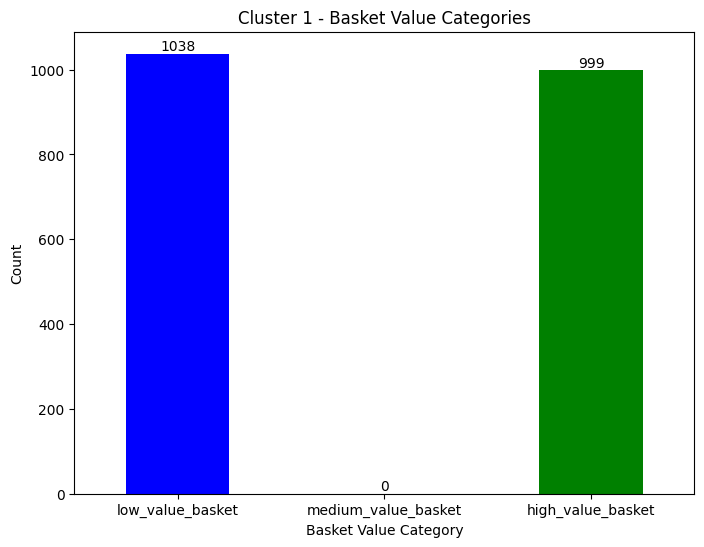

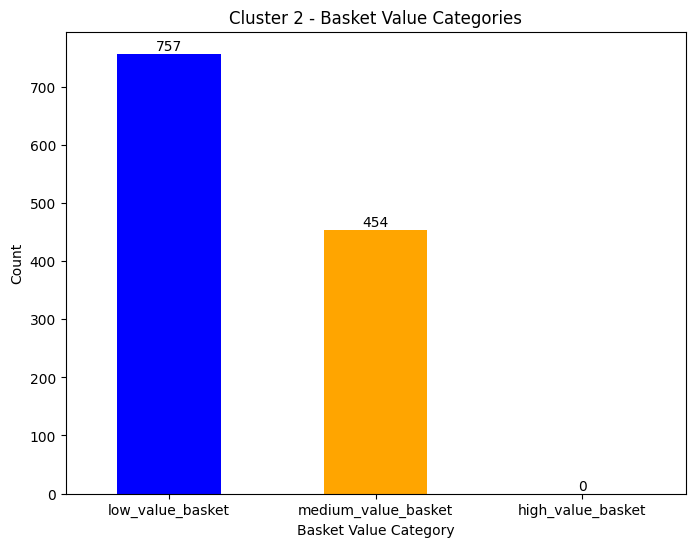

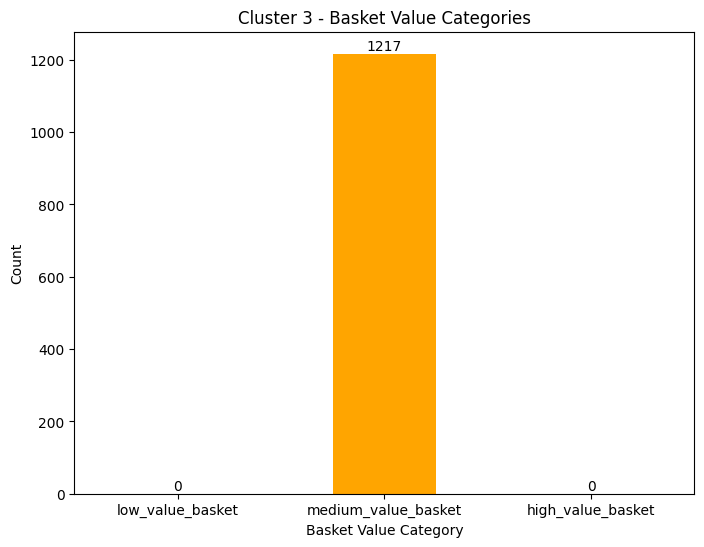

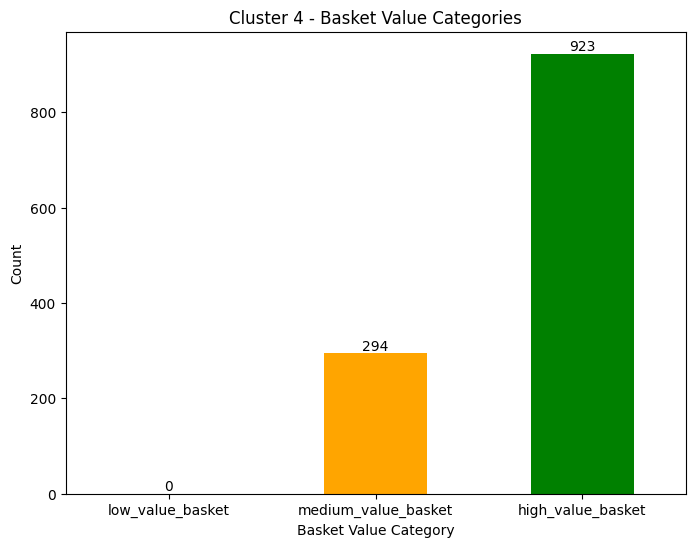

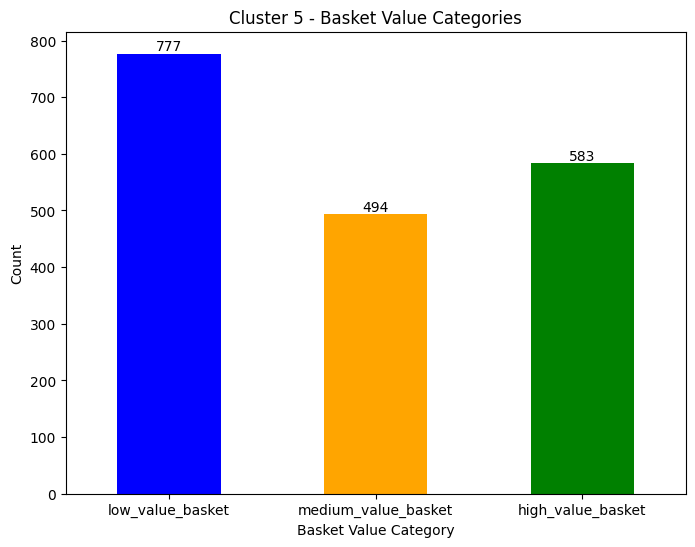

In [ ]:
# Συνάρητηση για plot των συναλλαγών κάθε cluster
def plot_cluster_transactions(cluster_number):

    cluster_data = binary_transactions[binary_transactions[f'Cluster {cluster_number}'] == True]
    basket_value_counts = cluster_data[['low_value_basket', 'medium_value_basket', 'high_value_basket']].sum()

    colors = ['blue', 'orange', 'green']
    basket_value_counts.plot(kind='bar', color=colors, figsize=(8, 6))
    plt.title(f'Cluster {cluster_number} - Basket Value Categories')
    plt.xlabel('Basket Value Category')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    for i, count in enumerate(basket_value_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.show()

# Plot συναλλαγών κάθε cluster
for i in range(1, 6):
    plot_cluster_transactions(i)

Ερμηνεύουμε τις μετρικές και τα γραφήματα που έχουμε πάρει παραπάνω για να αποδώσουμε έναν ποιοτικό χαρακτηρισμό σε κάθε ομάδα:

**Ομάδα 1**: Ομάδα πρόσφατων (εντός των τελευταίων 10 ημερών) συναλλαγών μεσαίας αξίας που αντιπροσωπεύει το 27.03% του συνόλου των συναλλαγών

**Ομάδα 2**: Ομάδα παλαιότερων (περίπου 2 μήνες πριν) συναλλαγών μικρής αξίας που αντιπροσωπεύει το 16.07% του συνόλου των συναλλαγών.

**Ομάδα 3**: Ομάδα παλαιότερων (1 έως 2 μήνες πριν) συναλλαγών μεσαίας προς μικρής αξίας που αντιπροσωπεύει το 16.15% του συνόλου των συναλλαγών.

**Ομάδα 4**: Ομάδα σχετικά πρόσφατων συναλλαγών (τις τελευταίες 2 έως 4 εβδομάδες) υψηλής αξίας που αντιπροσωπεύει το 16.15% του συνόλου των συναλλαγών.

**Ομάδα 5**: Ομάδα πολύ παλιών συναλλαγών (τουλάχιστον 2 μήνες πριν) μεσαίας αξίας που αντιπροσωπεύει το 24.6% του συνόλου των συναλλαγών.

**Συμπέρασμα**: Παρατηρούμε ότι η Ομάδα 4 είναι αυτή με την υψηλότερη αξία καλαθιού. Στα τελευταία γραφήματα (πράσινη στήλη) φαίνεται ότι οι συναλλαγές υψηλής αξίας της Ομάδας 4 (από 2 έως 4 εβδομάδες πριν) συνεχίζονται και μεταφέρθηκαν στην Ομάδα 1 (τελευταίες 10 ημέρες). Άρα το τμήμα μάρκετινγκ δεν θα έπρεπε να ανησυχεί για την Ομάδα 4. Βλέπουμε όμως, ότι οι συναλλαγές υψηλής αξίας της Ομάδας 5 ξαφνικά σταμάτησαν να γίνονται. Μπορούμε να το καταλάβουμε αυτό κοιτώντας το γράφημα των συναλλαγών της αμέσως επόμενης χρονολογικά όμαδας, δηλαδή της Ομάδας 2. Η στήλη των υψηλής αξίας καλαθιών έχουν μηδενιστεί. **Συνεπώς, η Ομάδα 5 είναι ανησυχητική και το τμήμα μάρκετινγκ πρέπει να εξετάσει τι συνέβη**.

# Άσκηση 4

Εφαρμόζουμε τη μέθοδο Apriori για να βρούμε τους κανόνες με το υψηλότερο confidence αποκλειστικά για τα προϊόντα και τις ομάδες συναλλαγών. Βρίσκουμε έως 20 κανόνες ανά cluster, με ελάχιστο support 0.3 (το ίδιο κατώφλι που χρησιμοποιείται σε όλη την εργασία).

In [ ]:
frequent_itemsets = apriori(binary_transactions.drop(columns=['low_value_basket','medium_value_basket','high_value_basket']), min_support=min_support, use_colnames=True)
rules_products = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

for cluster in range(1, 6):
    print(f"Top Rules for Cluster {cluster}:")

    cluster_rules = rules_products[
        rules_products['antecedents'].astype(str).str.contains(f'Cluster {cluster}') |
        rules_products['consequents'].astype(str).str.contains(f'Cluster {cluster}')
    ].nlargest(20, 'confidence')

    print(cluster_rules[['antecedents', 'consequents', 'confidence']])
    print()

Top Rules for Cluster 1:
            antecedents         consequents  confidence
34          (Cluster 1)        (whole milk)    0.434953
87      (bottled water)         (Cluster 1)    0.366145
100           (sausage)         (Cluster 1)    0.358225
35         (whole milk)         (Cluster 1)    0.352567
56   (other vegetables)         (Cluster 1)    0.342091
4        (citrus fruit)         (Cluster 1)    0.323096
57          (Cluster 1)  (other vegetables)    0.319588
14     (tropical fruit)         (Cluster 1)    0.236434
105   (root vegetables)         (Cluster 1)    0.230410
92             (yogurt)         (Cluster 1)    0.224490
74         (rolls/buns)         (Cluster 1)    0.200111
86          (Cluster 1)     (bottled water)    0.195385
75          (Cluster 1)        (rolls/buns)    0.177712
101         (Cluster 1)           (sausage)    0.162494
110              (soda)         (Cluster 1)    0.155102
93          (Cluster 1)            (yogurt)    0.151203
111         (Cluster 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Προϊοντικό προφίλ κάθε ομάδας:

**Ομάδα 1**: whole milk, bottled water, sausage, other vegetables, citrus fruit, tropical fruit, root vegetables, yogurt, rolls/buns, soda

**Ομάδα 2**: soda, rolls/buns, whole milk

**Ομάδα 3**: whole milk, soda, rolls/buns, other vegetables

**Ομάδα 4**: whole milk, sausage, other vegetables, rolls/buns, root vegetables, yogurt, tropical fruit, soda

**Ομάδα 5**: pastry, whole milk, soda, rolls/buns, yogurt, other vegetables (σημείωση: βλέπουμε ότι πολύ συχνά συνδυάζεται pastry με whole milk)

Παρατηρούμε ότι το προϊόν pastry αγοράζεται **αποκλειστικά** από την Ομάδα 5 και μάλιστα βρίσκεται στο 47% των καλαθιών την ομάδας αυτής. Όπως δείχνεται παρακάτω, το προϊόν pastry αγοράστηκε τελευταία φορά πριν από 68 ημέρες. Συμπεραίνουμε ότι το προϊόν αυτό πιθανότατα σταμάτησε να πωλείται και λόγω αυτού του γεγονότος ένα μεγάλο μέρος από τις συναλλαγές της ομάδας 5 έχει σταματήσει να γίνεται πλέον.

In [ ]:
# Βρίσκουμε πότε αγοράστηκε τελευταία φορά το προϊόν pastry
pastry_transactions = data[data.apply(lambda row: row.str.contains('pastry').any(), axis=1)]
min_recency_days_pastry = pastry_transactions['recency_days'].min()
print("Minimum value of recency days in transactions containing pastry:", min_recency_days_pastry)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Minimum value of recency days in transactions containing pastry: 68


Κάνουμε το ίδιο, αυτή τη φορά για τα προϊόντα, τις ομάδες των συναλλαγών και τη διακριτοποιημένη αξία καλαθιού μαζί.

In [ ]:
frequent_itemsets = apriori(binary_transactions, min_support=min_support, use_colnames=True)
rules_products = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

for cluster in range(1, 6):
    print(f"Top Rules for Cluster {cluster}:")

    cluster_rules = rules_products[
        rules_products['antecedents'].astype(str).str.contains(f'Cluster {cluster}') |
        rules_products['consequents'].astype(str).str.contains(f'Cluster {cluster}')
    ].nlargest(20, 'confidence')

    print(cluster_rules[['antecedents', 'consequents', 'confidence']])
    print()

Top Rules for Cluster 1:
                              antecedents          consequents  confidence
212           (tropical fruit, Cluster 1)  (high_value_basket)    1.000000
383               (rolls/buns, Cluster 1)  (high_value_basket)    1.000000
412                  (sausage, Cluster 1)  (high_value_basket)    1.000000
424          (Cluster 1, root vegetables)  (high_value_basket)    1.000000
456                     (soda, Cluster 1)  (high_value_basket)    1.000000
394                   (yogurt, Cluster 1)  (high_value_basket)    0.922078
275        (whole milk, low_value_basket)          (Cluster 1)    0.662182
334  (other vegetables, low_value_basket)          (Cluster 1)    0.647202
347         (other vegetables, Cluster 1)  (high_value_basket)    0.591398
174                           (Cluster 1)   (low_value_basket)    0.509573
274               (Cluster 1, whole milk)   (low_value_basket)    0.500000
287               (Cluster 1, whole milk)  (high_value_basket)    0.500000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Προκύπτουν κάποια νέα συμπεράσματα για κάθε ομάδα:

**Ομάδα 1**: Κάθε φορά που αγοράζεται tropical fruit, rolls/buns, sausage, root vegetables ή soda προκύπτει ότι το καλάθι είναι πάντα υψηλής αξίας.

**Ομάδα 2**: Δεν προκύπτει κάποιος νέος κανόνας που να έχει ενδιαφέρον.

**Ομάδα 3**: Γνωρίζαμε ήδη από τα γραφήματα που παρουσιάστηκαν ότι όλες οι συναλλαγές της Ομάδας 3 είναι μεσαίας αξίας. Δεν προκύπτει κάποιος νέος κανόνας που να έχει ενδιαφέρον.

**Ομάδα 4**: Όταν αγοράζεται sausage, yogurt, tropical fruit, rolls/buns, soda, other vegetables, whole milk ή root vegetables συνήθως το καλάθι έχει υψηλή αξία. Γνωρίζαμε όμως ήδη από τα γραφήματα ότι η πλειοψηφία των συναλλαγών της Ομάδας 4 είναι υψηλής αξίας. Δεν προκύπτει κάποιος νέος κανόνας που να έχει ενδιαφέρον.

**Ομάδα 5**: Κάθε καλάθι υψηλής αξίας της ομάδας 5 περιέχει pastry. Επομένως, αυτό επιβεβαιώνει το συμπέρασμα πως η διακοπή των πωλήσεων pastry οδήγησε και στον μηδενισμό τον καλαθιών υψηλής αξίας της ομάδας 5.